# DATA QUALITY:
---

A systematic data quality assessment was conducted to evaluate dataset integrity, including schema validation, missing value analysis, type verification, and outlier review. This step provides a clear understanding of data reliability and informs the required cleaning actions.

### Objective:
Understand the integrity and readiness of the raw data before transformation.
- Data Quality stage should NOT impute yet.
- It should only inspect missing values, not fix them.
- Data Quality = Show what’s wrong
- Data Cleaning = Fix what’s wrong
---

### Checks Performed:

- Dataset dimensions (df.shape)
- Schema inspection (df.info())
- Descriptive statistics (df.describe())
- Missing data audit (df.isna().sum())
- Duplicate record check
- Data type validation
    - Dates properly parsed
    - Numeric fields non-string
- Basic outlier review
    - Statistical boundaries
    - Visual checks
- Combine the DF and create and save new ones

### Deliverable:
A short "data health report" summarizing data issues and recommended fixes.


---

## marketing_campaign_2024 & 2025:


In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOAD DATA
# LOAD 1ST CSV - 2024 FILE
# LOAD 2nd CSV - 2025 FILE


df1 = pd.read_csv("../data/raw/marketing_campaign_2024.csv")
df2 = pd.read_csv("../data/raw/marketing_campaign_2025.csv")

In [3]:
df1.head()

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Search,South America,28252,5609,65466,39193.43,79017.74,Youth,Electronics,Desktop,2024
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Search,Asia,89608,83584,26865,17291.53,49868.54,Adults,Home,Mobile,2024
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Social,Europe,37853,62661,43662,6729.63,63021.28,Seniors,Electronics,Desktop,2024
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Display,Africa,10577,41421,75023,15077.58,133106.71,Seniors,Clothing,Desktop,2024
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Social,Asia,84039,56010,11283,16877.69,144736.99,Adults,Home,Mobile,2024


In [4]:
df2.head()

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year
0,2025_0001,Campaign_2025_0001,2025-03-04,2025-07-20,Display,North America,7696,3587,15144,11046.09,117455.53,Seniors,Services,Desktop,2025
1,2025_0002,Campaign_2025_0002,2025-04-05,2025-07-25,Print,Asia,79664,30373,75743,16419.25,92144.07,Youth,Home,Tablet,2025
2,2025_0003,Campaign_2025_0003,2025-03-18,2025-12-06,Print,North America,33324,89728,79251,33333.21,24070.68,Youth,Clothing,Desktop,2025
3,2025_0004,Campaign_2025_0004,2025-03-09,2025-11-02,Search,Asia,32528,33793,4948,14340.82,13570.48,Adults,Travel,Mobile,2025
4,2025_0005,Campaign_2025_0005,2025-05-21,2025-09-28,Email,Africa,80785,35905,36563,37133.14,122995.42,Seniors,Services,Tablet,2025


### Schema consistency check:

In [5]:
#INSPECT DF1


print(df1.shape)
print(type(df1))
print(df1.keys())
df1.info()
# df1.head()


(500, 15)
<class 'pandas.core.frame.DataFrame'>
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'region', 'impressions', 'clicks', 'conversions', 'spend_usd',
       'revenue_usd', 'target_audience', 'product_category', 'device', 'year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       500 non-null    object 
 1   campaign_name     500 non-null    object 
 2   start_date        500 non-null    object 
 3   end_date          500 non-null    object 
 4   channel           500 non-null    object 
 5   region            500 non-null    object 
 6   impressions       500 non-null    int64  
 7   clicks            500 non-null    int64  
 8   conversions       500 non-null    int64  
 9   spend_usd         500 non-null    float64
 10  revenue_usd       500 non-null

In [6]:
#INSPECT DF2

print(df1.shape)
print(type(df1))
print(df1.keys())
df1.info()
# df1.head()

(500, 15)
<class 'pandas.core.frame.DataFrame'>
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'region', 'impressions', 'clicks', 'conversions', 'spend_usd',
       'revenue_usd', 'target_audience', 'product_category', 'device', 'year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       500 non-null    object 
 1   campaign_name     500 non-null    object 
 2   start_date        500 non-null    object 
 3   end_date          500 non-null    object 
 4   channel           500 non-null    object 
 5   region            500 non-null    object 
 6   impressions       500 non-null    int64  
 7   clicks            500 non-null    int64  
 8   conversions       500 non-null    int64  
 9   spend_usd         500 non-null    float64
 10  revenue_usd       500 non-null

In [7]:
#INSPECT df1 2

#last 5 row of the table

df1.tail()

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year
495,2024_0496,Campaign_2024_0496,2024-05-01,2024-08-28,Print,Asia,87499,39992,23830,27953.15,148046.83,Seniors,Travel,Desktop,2024
496,2024_0497,Campaign_2024_0497,2024-04-18,2024-11-25,Email,South America,73716,33091,63260,30243.81,62698.23,Adults,Home,Mobile,2024
497,2024_0498,Campaign_2024_0498,2024-02-20,2024-10-01,Display,Europe,14446,50646,20254,2274.00,126139.27,Youth,Clothing,Desktop,2024
498,2024_0499,Campaign_2024_0499,2024-02-15,2024-09-25,Print,Africa,18805,89455,18272,35779.91,11580.95,Youth,Clothing,Mobile,2024
499,2024_0500,Campaign_2024_0500,2024-04-13,2024-11-05,Email,North America,44278,3427,19122,35432.96,41582.22,Youth,Services,Tablet,2024


In [8]:
# #SUMMARY STATS

# df1.describe()

In [9]:
# df1.isna().sum()

In [10]:
# #COUNT OF NULL VALUES

# df1.isnull().sum()

In [11]:
# #DUPLICATE ROWS

# df1.duplicated().sum()

In [12]:
# #UNIQUE VALUES

# df1.nunique()

In [13]:
# #just need to onfirm the uniqueness of this column

# df1['campaign_id'].is_unique

### Column Standardization:

In [14]:
# df1.columns = df1.columns.str.lower().str.strip().str.replace(' ', '_')
# df2.columns = df2.columns.str.lower().str.strip().str.replace(' ', '_')

for df in [df1, df2]:
    df.columns = (
        df.columns.str.lower()
        .str.strip()
        .str.replace(" ", "_")
    )



In [15]:
# Check Columns DF1 & DF2

print(df1.columns)
print(df2.columns)

Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'region', 'impressions', 'clicks', 'conversions', 'spend_usd',
       'revenue_usd', 'target_audience', 'product_category', 'device', 'year'],
      dtype='object')
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'region', 'impressions', 'clicks', 'conversions', 'spend_usd',
       'revenue_usd', 'target_audience', 'product_category', 'device', 'year'],
      dtype='object')


### Add Dataset Source Column:

In [16]:
#The new columns: dataset_year
#This is for me to know which observation is from sinc ei have 2 csv files 

df1["data_source"] = "H1_2024"
df2["data_source"] = "H1_2025"


In [17]:
# VAlIDATE NEW COLUMN MARKER


print(df1["data_source"][:5])
print(df2["data_source"][:5])

0    H1_2024
1    H1_2024
2    H1_2024
3    H1_2024
4    H1_2024
Name: data_source, dtype: object
0    H1_2025
1    H1_2025
2    H1_2025
3    H1_2025
4    H1_2025
Name: data_source, dtype: object


In [18]:
#Always validate

set(df1.columns) - set(df2.columns)
set(df2.columns) - set(df1.columns)


set()

## Concatenation of Dataset:

In [19]:
# Concatinate both clean files
# perp almost done!

df = pd.concat([df1, df2], ignore_index=True)


In [20]:
#validate

df["data_source"].value_counts()
df.shape


(1000, 16)

In [21]:

#The result

print("Combined dataset shape: ", df.shape)
print(df.info())
print(df.describe())
df.head(10)

Combined dataset shape:  (1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       1000 non-null   object 
 1   campaign_name     1000 non-null   object 
 2   start_date        1000 non-null   object 
 3   end_date          1000 non-null   object 
 4   channel           1000 non-null   object 
 5   region            1000 non-null   object 
 6   impressions       1000 non-null   int64  
 7   clicks            1000 non-null   int64  
 8   conversions       1000 non-null   int64  
 9   spend_usd         1000 non-null   float64
 10  revenue_usd       1000 non-null   float64
 11  target_audience   1000 non-null   object 
 12  product_category  1000 non-null   object 
 13  device            1000 non-null   object 
 14  year              1000 non-null   int64  
 15  data_source       1000 non-null   object 
dtypes: floa

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,data_source
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Search,South America,28252,5609,65466,39193.43,79017.74,Youth,Electronics,Desktop,2024,H1_2024
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Search,Asia,89608,83584,26865,17291.53,49868.54,Adults,Home,Mobile,2024,H1_2024
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Social,Europe,37853,62661,43662,6729.63,63021.28,Seniors,Electronics,Desktop,2024,H1_2024
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Display,Africa,10577,41421,75023,15077.58,133106.71,Seniors,Clothing,Desktop,2024,H1_2024
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Social,Asia,84039,56010,11283,16877.69,144736.99,Adults,Home,Mobile,2024,H1_2024
5,2024_0006,Campaign_2024_0006,2024-02-11,2024-12-19,Search,Europe,46728,87560,69277,6698.46,105523.82,Adults,Travel,Mobile,2024,H1_2024
6,2024_0007,Campaign_2024_0007,2024-05-07,2024-09-03,Search,Asia,24269,4485,39619,8269.18,113563.46,Seniors,Home,Mobile,2024,H1_2024
7,2024_0008,Campaign_2024_0008,2024-03-01,2024-09-13,Search,South America,45499,20267,8609,4110.73,59552.89,Seniors,Home,Desktop,2024,H1_2024
8,2024_0009,Campaign_2024_0009,2024-03-15,2024-07-31,Print,Asia,14398,79811,62095,14214.98,74892.62,Adults,Services,Mobile,2024,H1_2024
9,2024_0010,Campaign_2024_0010,2024-03-07,2024-10-15,Social,Africa,18278,57806,55147,17466.57,38287.83,Youth,Home,Mobile,2024,H1_2024


### Check Missing Value (no imputation yet):

In [22]:
df.isna().sum()

campaign_id         0
campaign_name       0
start_date          0
end_date            0
channel             0
region              0
impressions         0
clicks              0
conversions         0
spend_usd           0
revenue_usd         0
target_audience     0
product_category    0
device              0
year                0
data_source         0
dtype: int64

In [23]:
df.isnull().sum()

campaign_id         0
campaign_name       0
start_date          0
end_date            0
channel             0
region              0
impressions         0
clicks              0
conversions         0
spend_usd           0
revenue_usd         0
target_audience     0
product_category    0
device              0
year                0
data_source         0
dtype: int64

### Duplicate Check:

In [24]:
df.duplicated(subset=["campaign_id", "campaign_name"]).sum()

np.int64(0)

## Keep Changes - Save files as CSV to data/procesed folder:

In [25]:
#Save 3 files:
#1st - marketing_campaign_2024_clean.cs
#2nd - marketing_campaign_2025_clean.csv
#3rd - marketing_campaign_all_clean.csv
#The library os is truely a useful tool :)


os.makedirs("../data/processed", exist_ok=True)

df1.to_csv("../data/processed/marketing_campaign_2024_raw_labeled.csv", index=False)
df2.to_csv("../data/processed/marketing_campaign_2025_raw_labeled.csv", index=False)
df.to_csv("../data/processed/marketing_campaign_all_interim.csv", index=False)


#### Remarks:
NO missing Vlues here in this data set 

#### Notes:

theres no need to use these:
- Missing Value Summary:  df.isna().sum().sort_values(ascending=False)
- % missing:  (df.isna().mean() * 100).sort_values(ascending=False)
- Missing values will be imputed in the Data Cleaning stage.
- At this stage, we only audit missing values to understand the quality of the dataset.

## Initial Data Quality Viz:

---
- Missing values heatmap
- Basic summary histograms
- Boxplots to spot spending/revenue outliers
- Count plot of campaign sources (if available)
- Trend preview (Daily SPend/ Date time )

### Missing Values Heatmap:

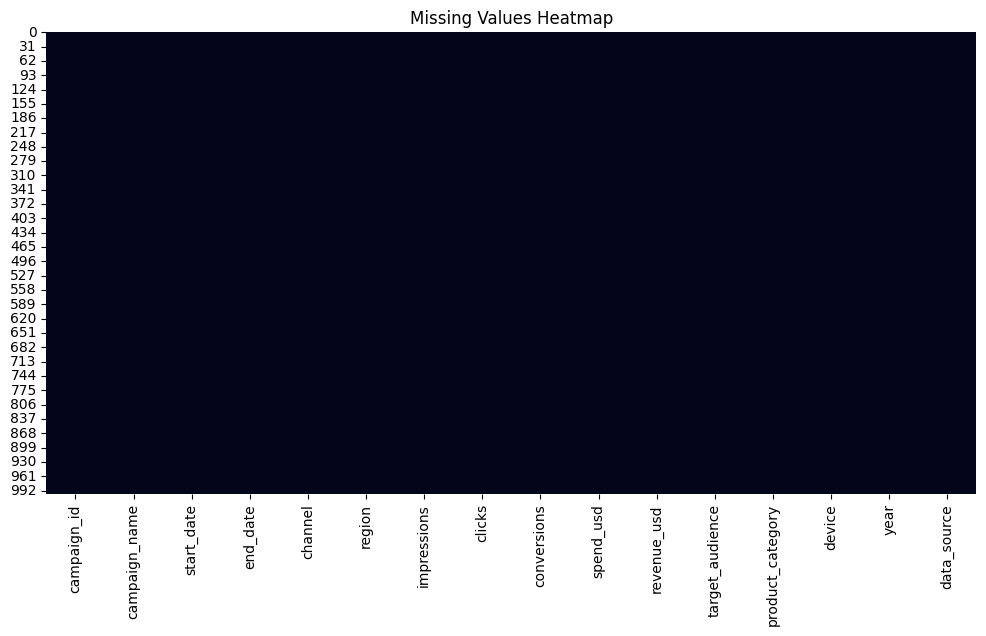

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

heatmap highlights patterns of missing values in the dataset. No imputation occurs at this stage; we are only assessing data completeness.

how ever the dataset does not have any cells with null nan or 0 values in them

### Distribution Overview:

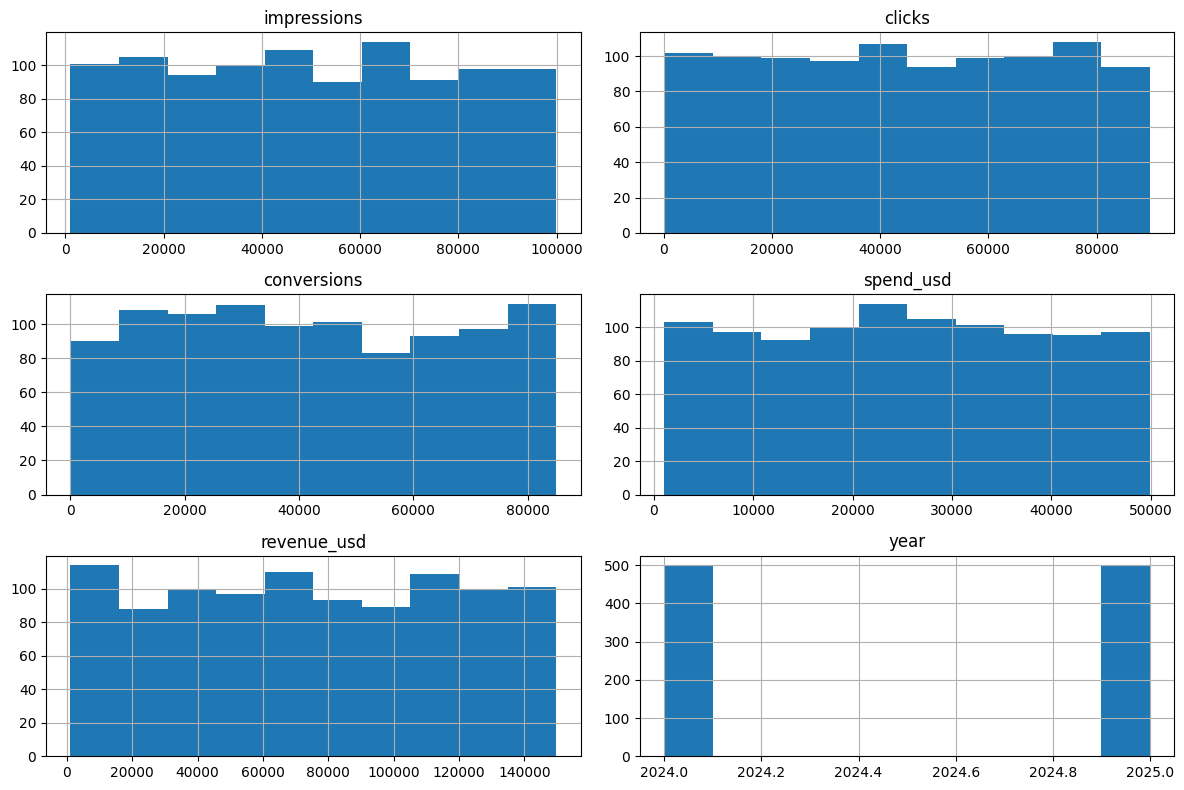

In [27]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

df[numeric_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

Histograms are used to quickly understand numeric value distributions and detect Consistency, Categorical Leakage and extreme skew or potential outliers.

- The Columns year & datasetYear are both markers from which table this set came from initialy so its suppose to look that way

1. impressions
- Distribution is fairly even (no extreme skew)
- Suggests that data includes a wide range of ad impressions & is spread uniformly.
- No obvious outliers.

2. clicks
- Also roughly uniform.
- No spikes or dips.
- Suggests consistent user interaction or measurement.

3. conversions
- Slight increase on the right side (higher values) (meaning more samples with higher conversion counts.)
- Possible mild skew toward high-performing data.

5. spend_usd
- Uniform to slightly left-skewed (a few high spend values, but many moderate ones).
- Healthy (typical for ad spend data.)

5. revenue_usd
- Even distribution (values are well spread as well)
- Suggests steady income range across data points.

6. year
- Only two bars visible (only a couple of years are represented - likely 2024 and 2025.)
- That’s expected (these are categorical markers encoded as numeric values.)

7. dataset_year
- Similar to year (two groups e.g., data extracted from 2024 and 2025 sources).
- As notes on year, “both columns are markers for where this data came from.”
- this is Expected behavior & not a continuous numeric data, just year tags.


### Boxplots for Spend & Revenue (Outlier Scan):

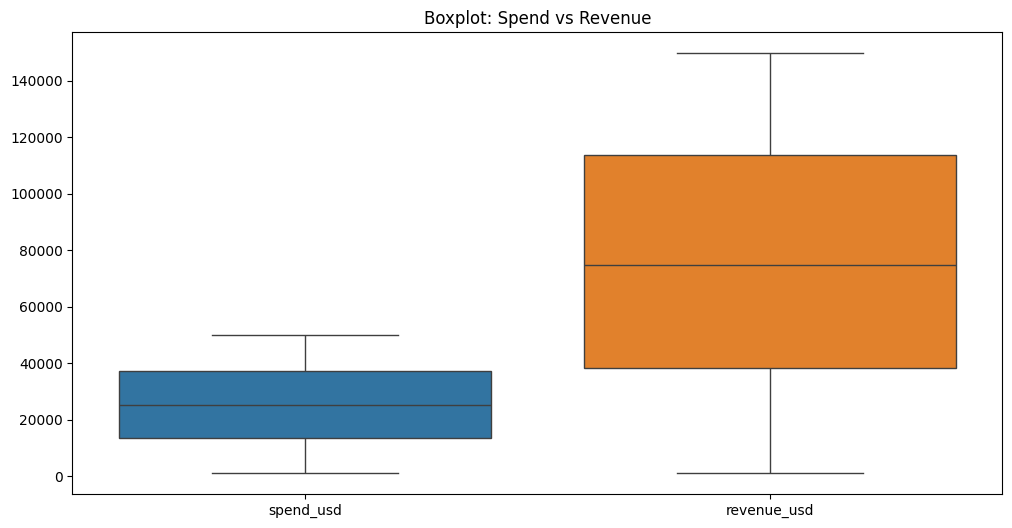

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['spend_usd','revenue_usd']])
plt.title("Boxplot: Spend vs Revenue")
plt.show()

Boxplots is use to help identify extreme values & potential anomalies in financial columns, what were looking into here is an extreme outlier

1. Spend (spend_usd):
- Median is around 25K–30K.
- Most values (IQR) are between 10K–40K.
- The whiskers go down close to 0, some campaigns or records have minimal spending.
- No strong outliers visible.

Interpretation: Stable spending behavior, not too much variation.

2. Revenue (revenue_usd)
- Median is roughly 75K–80K, meaning most campaigns earn more revenue than they spend.
- Wider box and longer whiskers (much higher variability.)
- Range goes up to ~140K, meaning some records perform significantly better.

Interpretation: a few low-revenue points near the bottom & some underperforming cases.

### Campaign Source Count Plot: 

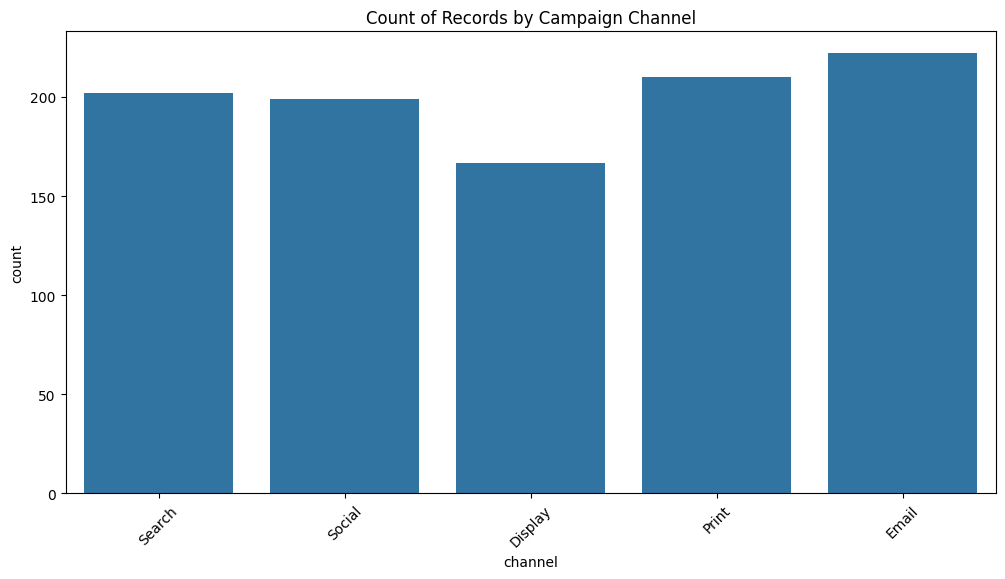

In [29]:
plt.figure(figsize=(12, 6))

sns.countplot(x='channel', data=df)

plt.xticks(rotation=45)
plt.title("Count of Records by Campaign Channel")

plt.show()

#### Remarks on Campaign Source:

- Visualizing the distribution of campaign sources helps spot imbalance or missing categories.
- I belive its much better if social is also broken down to weather the funds are used in FB, tiktok or google ads
-  as per owner of this data the template to track their activities somehow hasnt been updated for quite sometime now and they've been trackingusing it for their campaigns since, with the same old validation method hence the search, social, display and print Email is still in use but i have to check how come it has clicks

---
#### Confirmed Details with Owner of data:
 
 

#### New Marketing Channels Structure

| Old Channel | New Channel                 |
|-------------|-----------------------------|
| Search      | Google Ads                  |
| Social      | Facebook Ads                |
| Display     | Google Display Network      |
| Print       | TikTok Ads                  |
| Email       | Keep (still valid)*         |

---




#### Does Email Channel having clicks?
- Yes, email campaigns typically have clicks.
- Example: someone opens a marketing email and clicks a link (landing page, CTA button)
- Justification line for documentation:

Per owner email campaigns should include click events when recipients interact with links inside the email, so tracking clicks is meaningful for performance attribution. (they should have click thats what she said)

---


#### Google Display Network (GDN)
- GDN absolutely has clicks.
- Google Display Network = display banner ads on millions of partner websites, YouTube, apps, etc.
- It tracks:
    - impressions
    - clicks
    - conversions
    - spend

So clicks are valid here too

---

#### Summary of confirmed & Approved changes: 

| Old Channel | New Channel               | Clicks Expected | My Notes                    |
|--------------|---------------------------|----------------|-----------------------------|
| Search       | Google Ads                | Yes            | Search campaigns            |
| Social       | Facebook Ads              | Yes            | Paid social                 |
| Display      | Google Display Network    | Yes            | Display ads click-through   |
| Print        | TikTok Ads                | Yes            | Modern paid media           |
| Email        | Keep (still valid)*       | Yes            | Link click tracking         |


---


### Simple Trend Preview(Date Time):


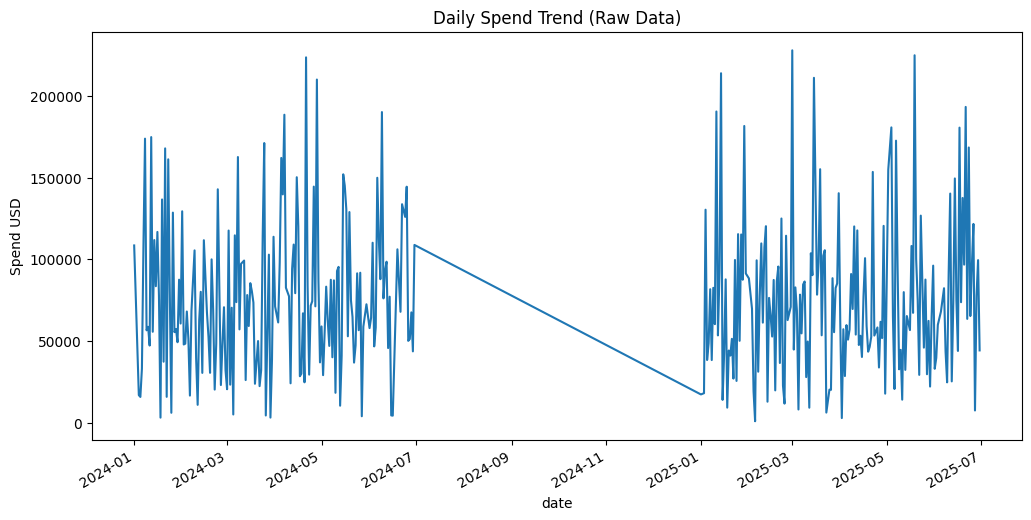

In [30]:
df['date'] = pd.to_datetime(df['start_date'], errors='coerce')

df.groupby('date')['spend_usd'].sum().plot(figsize=(12,6))

plt.title("Daily Spend Trend (Raw Data)")
plt.ylabel("Spend USD")
plt.show()

- Raw spend trend line reveals data continuity and potential gaps in reporting.
- Formal time-series cleaning and resampling will happen in the cleaning notebook.
- also a large gap in Data from July 2024 to Jan 2025 is seen here (confirmation of data range distribution is needed to be sure)

#### VALIDATION CHECK 1: The earliest and latest date values

In [31]:
df['date'].min(), df['date'].max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2025-06-30 00:00:00'))

#### VALIDATION CHECK 2: check if any dates failed to convert

In [32]:
df[df['date'].isna()].head()

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,data_source,date


#### VALIDATION CHECK 3: Plot only monthly aggregated spend to verify the pattern

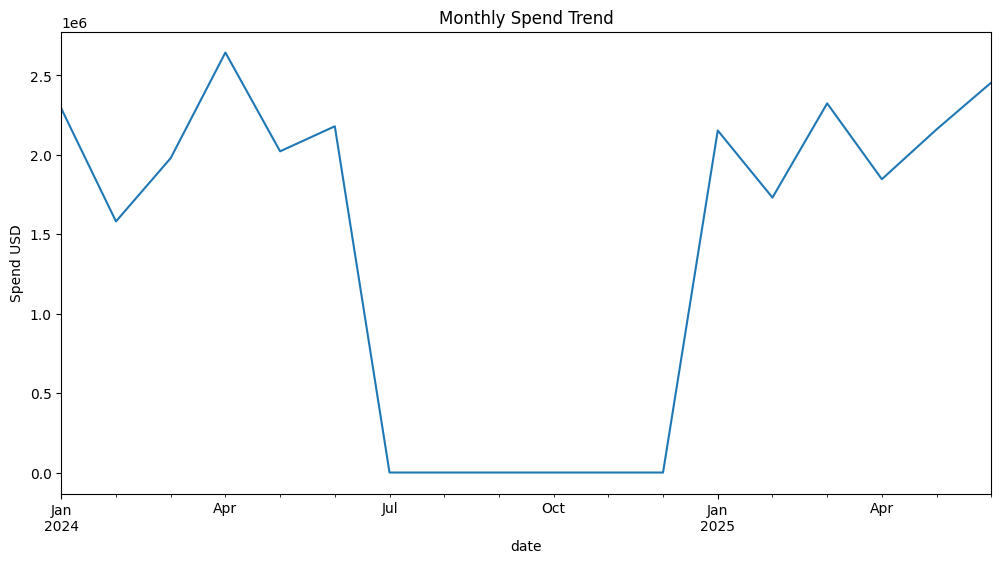

In [33]:
# CHECK THE TREND BY MONTH

df.groupby(pd.Grouper(key="date", freq="ME"))['spend_usd'].sum().plot(figsize=(12,6))

plt.title("Monthly Spend Trend")
plt.ylabel("Spend USD")
plt.show()

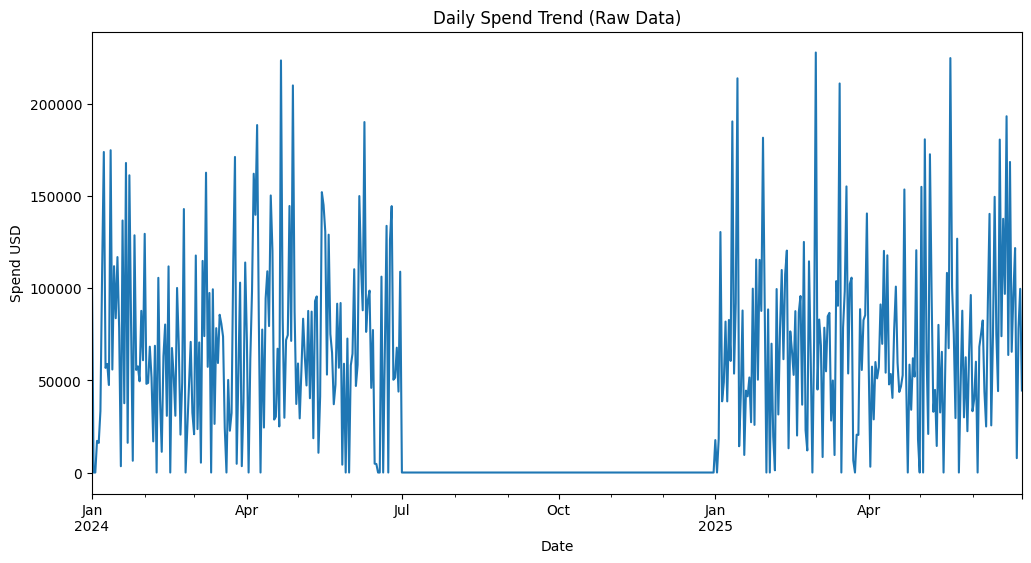

In [34]:
# Updated Code for better understanding

df['date'] = pd.to_datetime(df['start_date'], errors='coerce')

daily_spend = df.groupby(pd.Grouper(key='date', freq='D'))['spend_usd'].sum()

daily_spend.plot(figsize=(12,6))

plt.title("Daily Spend Trend (Raw Data)")
plt.ylabel("Spend USD")
plt.xlabel("Date")
plt.show()

#### What the pattern Shows:

- Months around July–December 2024 show almost zero spend. Then spending resumes January 2025 onward.
- That means the dataset has a gap/pause period in campaigns.
    - probably had campaigns that ended mid-2024
    - A break period (no campaigns)
    - Campaigns starting again in early 2025
    - Could be business-driven (budget cycle, seasonal pause)
    - Could be data-related (missing uploads or bad ETL ingestion)
    - When the spend resumes in Jan 2025, the pattern mirrors earlier periods, suggesting business-as-usual again.
- I think the numbers are correct, but it looks odd for marketing schedule because companies rarely stop campaigns for months.

This is something I need to confirm with the owner as well.

for now i think the need to cross-check with campaign logs to see if they indeed stopped else i need to Flag the period July–Dec 2024 in the cleaning notebook or Avoid training time-based models without addressing the gap, otherwise models might think of it as seasonality gap 


## Initial Data Quality Visualization Summary:

The following diagnostic charts were generated to assess data integrity prior to cleaning:

- Missing values heatmap
- Numeric distribution histograms
- Boxplots for financial metrics
- Category distribution count plot
- Raw spend trend line

These visualizations highlight potential issues such as missing values, skewed distributions, gap in the time line, and outliers. No data modifications were performed at this stage; all transformations will occur in the Data Cleaning notebook.